# **Demo 2**

Dataset: [1000 Cameras Dataset](https://www.kaggle.com/datasets/crawford/1000-cameras-dataset)

Selection Rationale: I choose this dataset as I love taking photos and videos, and think its interesting to be able to compare and learn about the difference specs of various cameras in one place.

---

### Analysis Objectives & Plan

1. Test to see if their is a correlation between the weight of a camera versus its release date using a scatter plot. 
- Step 1: Select the colunns "Release Date" and "Weight (inc batteries)", and hide any missing data
- Step 2: Create a scatter plot with a trend line to observe any potential trends
- Step 3: Calculate the correlation coefficient between the weight and release date 

2. Determining the most common camera release date from 1994-2007. 
- Step 1: Extracting the "Release Date" column as integer values
- Step 2: Specify and confirm that the releas years are from the time frame 1994-2007 as indictaed on the csv dataset.
- Step 3: Plot a bar chart with a trend line to visualize the most common release years within this possible time frame identified by this dataset.
- Step 4: Enhance the chart by adding data labels to the top, adding grid lines, and customizng the appearance to appear more readable. 

3. Mean price of Canon cameras versus Fujifilm cameras to see if there is a statistical significance between them.
- Step 1: Create two new DataFrames for Canon and Fujifilm cameras as there are various modles in each type. 
- Step 2: Confirm the total number of Canon and Fujifilm camera models identified in the new DataFrames to ensure it is the same as in the csv 
- Step 3: Extract the "Price" columns for Canon and Fujifilm cameras 
- Step 4: Perform the Mann-Whitney U Test with a 0.05 significane level 
- Step 5: Print the calculated p=value and check if is less than alpha. 

Cool plan - excited to see it in action!

---

### Import Libraries 

In [1]:
# import necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np  
from scipy import stats
import scipy.stats as stats

### Import and Explore Data 
- Import dataset and assign to a varibale named `df`
- Print/output the following (as pythonically as possible): 
    - DataFrame's shape 
    - Column names
    - First 5 rows 

In [2]:
# import data from csv file
df=pd.read_csv('camera_dataset.csv')

In [3]:
print("DataFrame Shape:", df.shape)

print("\nColumn Names:")
print(df.columns)

DataFrame Shape: (1038, 13)

Column Names:
Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')


Should include a comment here to indicate what the code is doing.

In [4]:
# output first 5 rows 
print(df.head())

                    Model  Release date  Max resolution  Low resolution  \
0        Agfa ePhoto 1280          1997            1024             640   
1        Agfa ePhoto 1680          1998            1280             640   
2        Agfa ePhoto CL18          2000             640               0   
3        Agfa ePhoto CL30          1999            1152             640   
4  Agfa ePhoto CL30 Clik!          1999            1152             640   

   Effective pixels  Zoom wide (W)  Zoom tele (T)  Normal focus range  \
0                 0             38            114                  70   
1                 1             38            114                  50   
2                 0             45             45                   0   
3                 0             35             35                   0   
4                 0             43             43                  50   

   Macro focus range  Storage included  Weight (inc. batteries)  Dimensions  \
0               40.0           

Outputs look good!

---

#### Objective 1: Test to see if their is a correlation between the weight of a camera versus its release date using a scatter plot.

In [5]:
# Step 1: Select the colunns "Release Date" and "Weight (inc batteries)", and hide any missing data
selected_columns = df[['Release date', 'Weight (inc. batteries)']]
selected_columns = selected_columns.dropna()

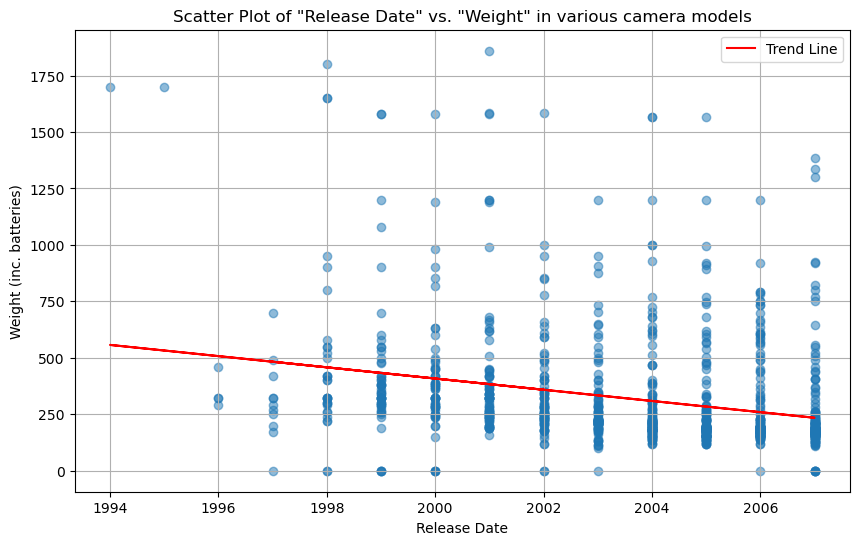

In [6]:
# Step 2: Create a scatter plot with a trend line to observe any potential trends
plt.figure(figsize=(10, 6))
plt.scatter(selected_columns['Release date'], selected_columns['Weight (inc. batteries)'], alpha=0.5)
plt.title('Scatter Plot of "Release Date" vs. "Weight" in various camera models')
plt.xlabel('Release Date')
plt.ylabel('Weight (inc. batteries)')
plt.grid(True)

# Calculate and add the trend line (line of best fit)
x = selected_columns['Release date']
y = selected_columns['Weight (inc. batteries)']
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)
plt.plot(x, trend_line(x), color='red', label='Trend Line')

plt.legend()
plt.show()

In [7]:
# Step 3: Calculate the correlation coefficient between the weight and release date 
correlation_coefficient = selected_columns['Release date'].corr(selected_columns['Weight (inc. batteries)'])

# Output the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.2596805175562906


Wow, great job with the analysis for this objective!

#### Objective 2: Determining the most common camera release date from 1994-2007. 

In [11]:
# Step 1: Extracting the "Release Date" column as integer values
release_years = df['Release date']


In [12]:
# Step 2: Specify and confirm that the releas years are from the time frame 1994-2007 as indictaed on the csv dataset.
valid_years = release_years[(release_years >= 1994) & (release_years <= 2007)]

In [14]:
# Step 3: Plot a bar chart with a trend line to visualize the most common release years within this possible time frame identified by this dataset.

# Calculate the trend line (simple moving average)
window = 3  # Adjust the window size for your desired smoothing
trend_line = release_year_counts.rolling(window=window).mean()

# Plot a bar chart to visualize the most common release years within the specified time frame
plt.figure(figsize=(10, 6))
plt.bar(release_year_counts.index, release_year_counts, label='Camera Releases')
plt.plot(trend_line.index, trend_line, color='red', label=f'Trend Line (SMA {window})')
plt.title('Most Common Camera Release Years (1994-2007) with Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Cameras')
plt.legend()
plt.show()

NameError: name 'release_year_counts' is not defined

This code spits out an error. The variable ```release_year_counts``` is not defined.

NameError: name 'release_year_counts' is not defined

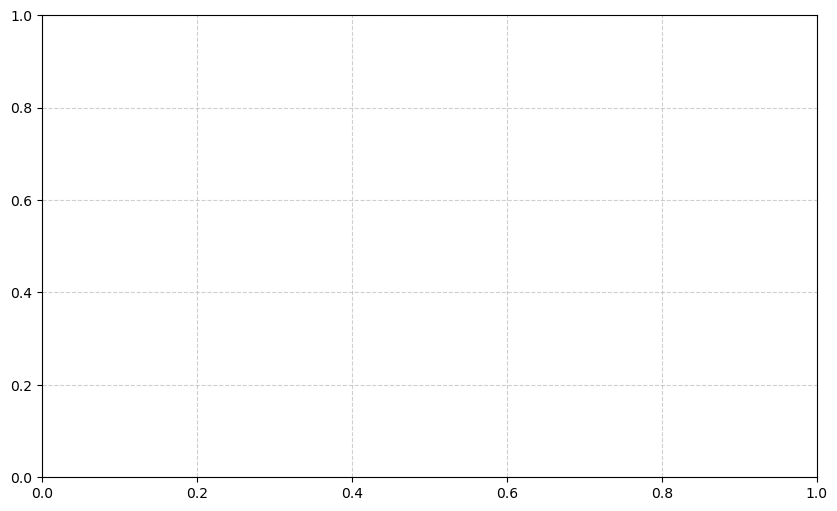

In [15]:
# Step 4: Enhance the chart by adding data labels to the top, adding grid lines, and customizng the appearance to appear more readable. 

fig, ax = plt.subplots(figsize=(10, 6))

# Plot grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Plot the bar chart
bars = ax.bar(release_year_counts.index, release_year_counts, label='Camera Releases')

# Add data labels to the top of each bar for each year
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset for better readability
                textcoords="offset points",
                ha='center', va='bottom')

# Plot the trend line 
ax.plot(trend_line.index, trend_line, color='red', label=f'Trend Line (SMA {window})')

# Customize the appearance
ax.set_title('Most Common Camera Release Years (1994-2007) with Trend Line')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Cameras')
ax.legend()


plt.tight_layout() 
plt.show()



This code spits out an error. The variable ```release_year_counts``` is not defined.

### Objective 3: Comparing mean prices of Canon cameras versus Fujifilm cameras to see if there is a statistical significance between them.

In [16]:
# Step 1: Create two new DataFrames for Canon and Fujifilm cameras as there are various modles in each type. 
canon_cameras = df[df['Model'].str.contains('Canon', case=False)]
fujifilm_cameras = df[df['Model'].str.contains('Fujifilm', case=False)]

In [17]:
# Step 2: Confirm the total number of Canon and Fujifilm camera models identified in the new DataFrames to ensure it is the same as in the csv 

num_canon_models = len(canon_cameras)

num_fujifilm_models = len(fujifilm_cameras)

print(f"Number of Canon camera models identified: {num_canon_models}")
print(f"Number of Fujifilm camera models identified: {num_fujifilm_models}")

Number of Canon camera models identified: 115
Number of Fujifilm camera models identified: 99


In [18]:
# Step 3: Extract the "Price" columns for Canon and Fujifilm cameras 
canon_prices = canon_cameras['Price']
fujifilm_prices = fujifilm_cameras['Price']

In [19]:
# Step 4: Perform the Mann-Whitney U Test with a 0.05 significane level 

U, p_value = stats.mannwhitneyu(canon_prices, fujifilm_prices, alternative='two-sided')

alpha = 0.05

In [20]:
# Step 5: Print the calculated p=value and check if is less than alpha. 

# Print the calculated p-value
print(f"Calculated p-value: {p_value:.4f}")

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a statistically significant difference in the average price between Canon and Fujifilm cameras.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no statistically significant difference in the average price between Canon and Fujifilm cameras.")

Calculated p-value: 0.6418
Fail to reject the null hypothesis
There is no statistically significant difference in the average price between Canon and Fujifilm cameras.


Nice work in this section!

---

## Conclusions 

In this demo I analyzed the "1000 cameras dataset" in 3 different ways using 3 objectives to gain insights from this dataset. In objective 1,  I aimed to explore the correlation between a camera's weight and release date. By cretaing a scatter plot with a trend line of these 2 properties, a negative correlation was found with a coefficient of -0.26. This indicates that there was a weak negative correlation, suggesting that a camera's weight tends to decrease over the years. This insight could be useful for researchers studying camera design and manufacturures, as they can use this to then explore more lightweaight materials and focus on designes that can advance this. This can also be insightful for market analysis and to understand consumer preferences over the years. 

In objective 2, I wanted to determine the most common release date and tredns wiithtin the years 1994-2007 as this is what the data set conatined. I specificlay wanted to see if there was a certain year that more cameras were released or if there was a positive linear relationship as technological advancements were made over the years. As a reuslt a bar chart was made which showed an upward trend in the number of cameras released over the years. Specificlay we can see that the most recent year on the dataset, 2007, had the highest number of cameras released, while the year 1994 had only 1 camera released in this dataset. This information can be specificlay helpfull for market analysis and technological trends. Manufactures can use this information to predict market and consumer demand trends. In addition as there has been an increase every year in the amount of cameras released reserachers can use this insight to study the technological evolution of cameras during this specific period. 

In objective 3, I aimed to compare the mean prices of Canon cameras vs Fujifilm cameras. As these are one of the 2 most popular cameras I wanted to see if there was a significane differrcne between the two in terms of their prices. By cretaing seperate DataFrames for all Canon and Fujifilm cameras, I was able to perofm a Mann-Whitney U Test. The p-value calculated from this test was 0.6418 which is greater then the alpha value of 0.05. As a result it shows that there is no statisitclay significant difference in the average price between Canon and Fujifilm cameras. This outcome can provide insight to consumers who are wanting to know more information about the two. In my personal experience I have always wondered if one brand was generally more "affordable" but as this test supports (from the years 1994-2007) there is no significant price differcne between the two acorss the various models. 

Wow, super impressed with how you explained the results and explained their value - awesome!